In [559]:
#### plots for link between behaviour and features of replay.... 
import os 
import pandas as pd
import numpy as np 
import json 
import matplotlib.pyplot as plt 
import scipy 
import ast
import math


def define_all_mice_behav_vars_dict():
    all_mice_behav_vars_dict = {'mouse':[],
                            'num_trials':[],
                            'correct_transit_rate':[],
                            'error_transit_rate':[],
                            'neutral_transit_rate':[],
                            'perf_score':[],
                            'total_transitions':[],
                            'transits_per_reward':[],
                            'seconds_per_reward':[]}
    return all_mice_behav_vars_dict


def define_all_mice_replay_data_vars_dict():
    all_mice_replay_data_variables = {
                'mouse':[],
                'event_rpm':[],
                'motif_event_rpm':[],
                'motif_relative_event_proportion':[],
                'spikes_per_event':[],
                'motif_by_motif_spikes_per_event':[],
                'units_per_event':[],
                'motif_by_motif_units_per_event':[],
                'event_lengths':[],
                'motif_by_motif_event_lengths':[],
                'proportion_single_events_coactivly_paired':[],
                'coactive_group_lengths':[],
                'meaned_order_overall_ordered_prop':[],
                'meaned_order_task_related_ordered_prop':[],
                'meaned_order_overall_other_prop':[],
                'fs_order_overall_ordered_prop':[],
                'fs_order_task_related_ordered_prop':[],
                'fs_order_overall_other_prop':[],
                'motif_proportion_coactive':[],
                'motif_meaned_ordering_ordered_prop_out_of_all_task_related':[],
                'motif_fs_ordering_ordered_prop_out_of_all_task_related':[],
                'Ratio_task_related_to_non_task_related_events':[]}
    return all_mice_replay_data_variables


def add_behav_vars_to_dict(all_mice_behav_vars_dict,processed_poke_data,mouse):
    all_mice_behav_vars_dict['mouse'] += [mouse]
    all_mice_behav_vars_dict['num_trials'] += [processed_poke_data.num_trials[0]] 
    all_mice_behav_vars_dict['correct_transit_rate'] += [processed_poke_data.correct_transit_rate[0]]
    all_mice_behav_vars_dict['error_transit_rate'] += [processed_poke_data.error_transit_rate[0]]
    all_mice_behav_vars_dict['neutral_transit_rate'] += [processed_poke_data.neutral_transit_rate[0]]
    all_mice_behav_vars_dict['perf_score'] += [processed_poke_data.perf_score[0]]
    all_mice_behav_vars_dict['total_transitions'] += [processed_poke_data.total_transitions[0]]
    all_mice_behav_vars_dict['transits_per_reward'] += [processed_poke_data.transits_per_reward[0]]
    all_mice_behav_vars_dict['seconds_per_reward'] += [processed_poke_data.seconds_per_reward[0]]
    return all_mice_behav_vars_dict

def add_replay_vars_to_dict(all_mice_replay_data_variables,replay_data_variables,mouse):
    all_mice_replay_data_variables['mouse'] += [mouse]
    all_mice_replay_data_variables['event_rpm'] += [replay_data_variables['event_rpm']]
    all_mice_replay_data_variables['motif_event_rpm'] += [replay_data_variables['motif_event_rpm']]
    all_mice_replay_data_variables['motif_relative_event_proportion'] += [replay_data_variables['motif_relative_event_proportion']]
    all_mice_replay_data_variables['spikes_per_event'] += [replay_data_variables['spikes_per_event']]
    all_mice_replay_data_variables['motif_by_motif_spikes_per_event'] += [replay_data_variables['motif_by_motif_spikes_per_event']]
    all_mice_replay_data_variables['units_per_event'] += [replay_data_variables['units_per_event']]
    all_mice_replay_data_variables['motif_by_motif_units_per_event'] += [replay_data_variables['motif_by_motif_units_per_event']]
    all_mice_replay_data_variables['event_lengths'] += [replay_data_variables['event_lengths']]
    all_mice_replay_data_variables['motif_by_motif_event_lengths'] += [replay_data_variables['motif_by_motif_event_lengths']]
    all_mice_replay_data_variables['proportion_single_events_coactivly_paired'] += [replay_data_variables['proportion_single_events_coactivly_paired']]
    all_mice_replay_data_variables['coactive_group_lengths'] += [replay_data_variables['coactive_group_lengths']]
    all_mice_replay_data_variables['meaned_order_overall_ordered_prop'] += [replay_data_variables['meaned_order_overall_ordered_prop']]
    all_mice_replay_data_variables['meaned_order_task_related_ordered_prop'] += [replay_data_variables['meaned_order_task_related_ordered_prop']]
    all_mice_replay_data_variables['meaned_order_overall_other_prop'] += [replay_data_variables['meaned_order_overall_other_prop']]
    all_mice_replay_data_variables['fs_order_overall_ordered_prop'] += [replay_data_variables['fs_order_overall_ordered_prop']]
    all_mice_replay_data_variables['fs_order_task_related_ordered_prop'] += [replay_data_variables['fs_order_task_related_ordered_prop']]
    all_mice_replay_data_variables['fs_order_overall_other_prop'] += [replay_data_variables['fs_order_overall_other_prop']]
    all_mice_replay_data_variables['motif_proportion_coactive'] += [replay_data_variables['motif_proportion_coactive']]
    all_mice_replay_data_variables['motif_meaned_ordering_ordered_prop_out_of_all_task_related'] += [replay_data_variables['motif_meaned_ordering_ordered_prop_out_of_all_task_related']]
    all_mice_replay_data_variables['motif_fs_ordering_ordered_prop_out_of_all_task_related'] += [replay_data_variables['motif_fs_ordering_ordered_prop_out_of_all_task_related']]
    all_mice_replay_data_variables['Ratio_task_related_to_non_task_related_events'] += [replay_data_variables['Ratio_task_related_to_non_task_related_events']]

    return all_mice_replay_data_variables


import seaborn as sns

def regression_plot(var1, var2, string1, string2,ax,plot_counter):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(var1, var2)
    if p_value < 0.2:
        sns.regplot(x=var1, y=var2, ax=ax, scatter_kws={'color': 'black', 's': 10}, line_kws={'color': 'red'})
    else:
        sns.regplot(x=var1, y=var2, ax=ax, scatter_kws={'color': 'black', 's': 10}, line_kws={'color': 'black'})
    ax.set_xlabel(string1, size = 10)
    # if plot_counter == 0:
    ax.set_ylabel(string2, size = 10)
    ax.set_title(f'Regression p-value: {p_value:.4f}', size = 8)    
    
    # Make axis numbers smaller
    ax.tick_params(axis='both', labelsize=10)
    return p_value

def plot_regressions_replay_vs_poke_data(var1,details,y_axis_data):
    fig, ax = plt.subplots(1,len(all_mice_behav_vars_dict.keys()) -1,figsize=(18, 3))
    plot_counter = 0
    for key in list(all_mice_behav_vars_dict):
        if not key == 'mouse':
            regression_plot(all_mice_behav_vars_dict[key],y_axis_data,key,var1,ax[plot_counter],plot_counter)
            plot_counter += 1
    # Add a title above all subplots
    fig.suptitle(f'{var1} vs behaviour features', fontsize=12, fontweight="bold", x = 0,y = 1.1, ha = 'left')
    # Add a subheading using fig.text()
    fig.text(0, 0.96, f"{details} vs feature extracted from poke data", ha='left', fontsize=10, color = 'green')
    # Adjust layout for better spacing
    plt.tight_layout()  # Adjust bottom spacing


def convert_string_list_to_list(list_of_strings):
    return [ast.literal_eval(item) if isinstance(item, str) and item.lower() != 'nan' else None for item in list_of_strings]



data_path = r"Z:\projects\sequence_squad\revision_data\emmett_revisions\sleep_wake_link_data\behaviour_to_replay\processed_data\\"

In [557]:
all_mice_behav_vars_dict = define_all_mice_behav_vars_dict()
all_mice_replay_data_variables = define_all_mice_replay_data_vars_dict()
counter1 = 0
for mouse in os.listdir(data_path):
    if not 'png' in mouse:
        current_path = os.path.join(data_path,mouse)
        
        #check if data has been processed alreayd 
        processed = True
        if not 'sequential_NREM_and_REM_sleep' in os.listdir(current_path):
            print(f'missing replay data for {mouse}')
            processed = False
        if not 'processed_poke_data.csv' in os.listdir(current_path) and not 'processed_tracking_data.csv' in os.listdir(current_path):
            print(f'missing poke data for {mouse}')
            processed = False
            
        if processed == True:
            print(f'loading data for {mouse}')
            # load in behavioural data 
            processed_poke_data = pd.read_csv(os.path.join(current_path,'processed_poke_data.csv'))
            # extract the poke data to dict
            all_mice_behav_vars_dict = add_behav_vars_to_dict(all_mice_behav_vars_dict,processed_poke_data,mouse)
            # load in tracking data
            processed_tracking_data = pd.read_csv(os.path.join(current_path,'processed_tracking_data.csv'))
            # add in mouse name column
            processed_tracking_data.insert(0, 'mouse_name', [mouse] * len(processed_tracking_data))
            # extract tracking data to overall dataframe
            if counter1 == 0:
                all_mice_processed_tracking_data = processed_tracking_data.copy()
                counter1 = 1
            else:
                all_mice_processed_tracking_data = pd.concat([all_mice_processed_tracking_data,processed_tracking_data])
            # load in replay data
            current_replay_path = os.path.join(current_path,'sequential_NREM_and_REM_sleep')
            # load in the json dict 
            with open(os.path.join(current_replay_path,'replay_data_variables.json')) as f:
                replay_data_variables = json.load(f)
                all_mice_replay_data_variables = add_replay_vars_to_dict(all_mice_replay_data_variables,replay_data_variables,mouse)


loading data for EJT136_1_3
loading data for EJT136_1_4
loading data for EJT149_1_1
loading data for EJT178_1_4
loading data for EJT178_1_5
loading data for EJT178_1_6
loading data for EJT178_1_7
loading data for EJT178_1_8
loading data for EJT178_1_9
loading data for EJT178_2_1
loading data for EJT178_2_2
loading data for EJT178_2_4
missing poke data for EJT269_1_4
missing poke data for EJT269_1_7
loading data for EJT270_1_5
missing poke data for EJT270_1_6


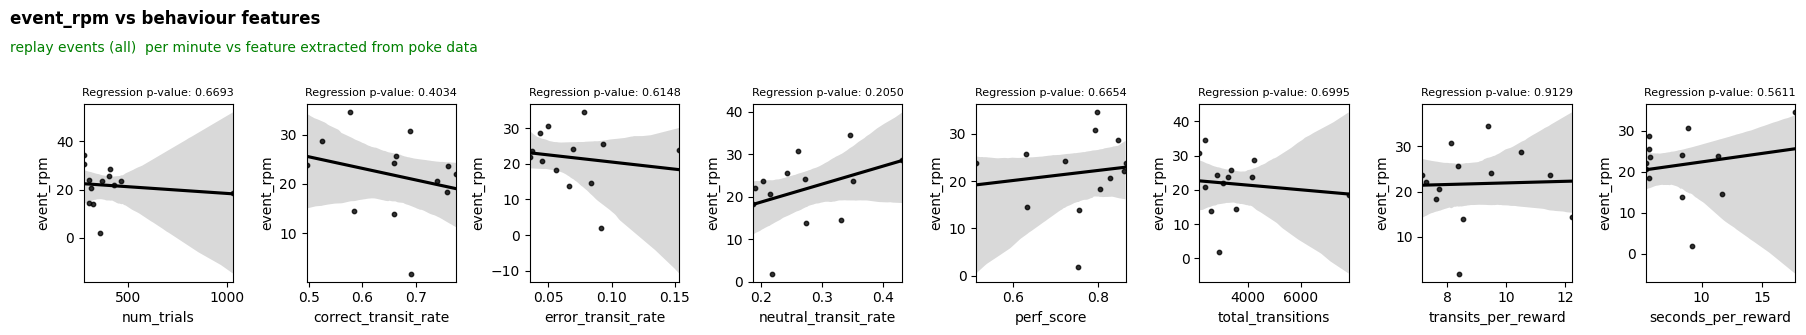

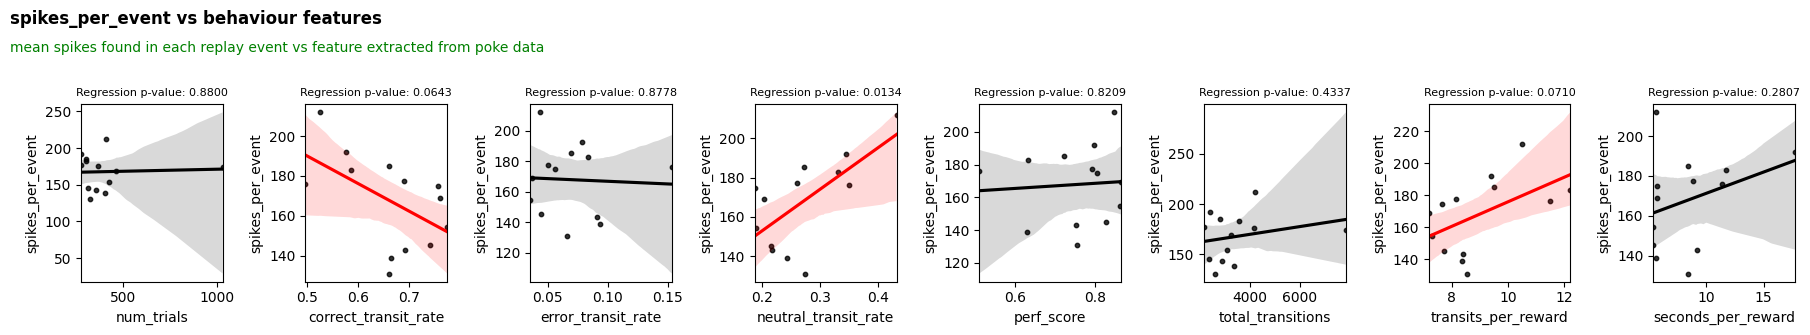

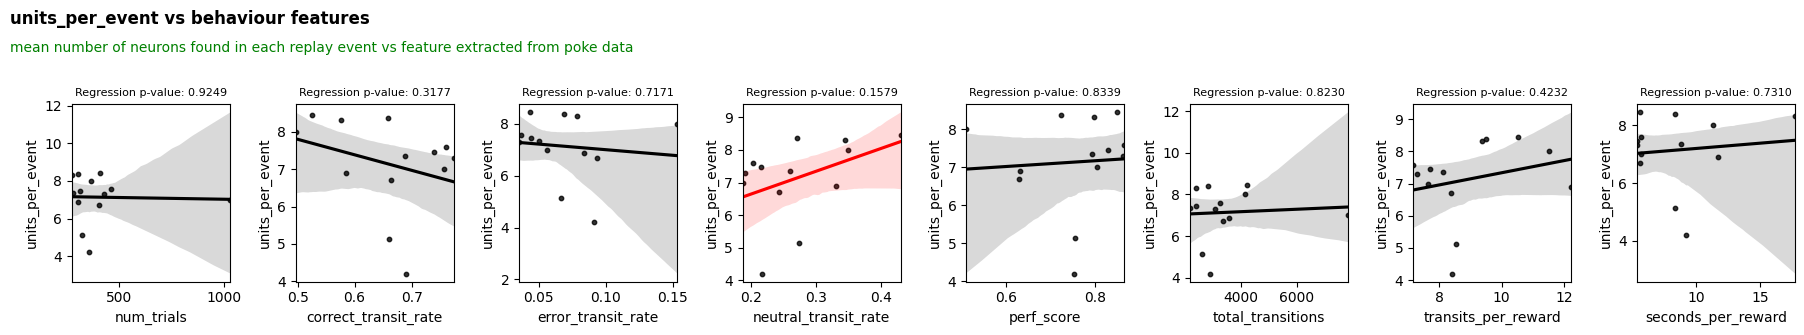

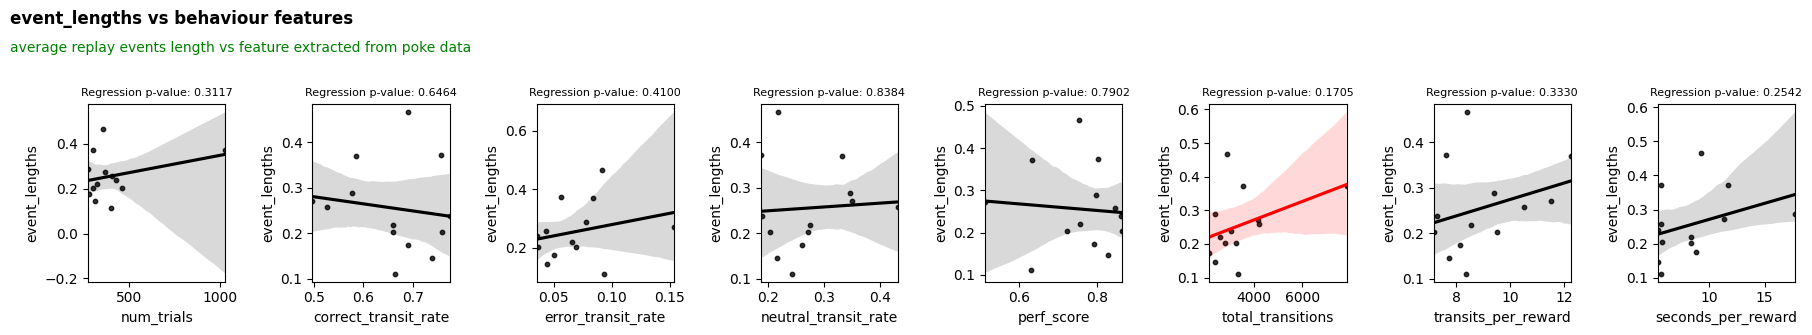

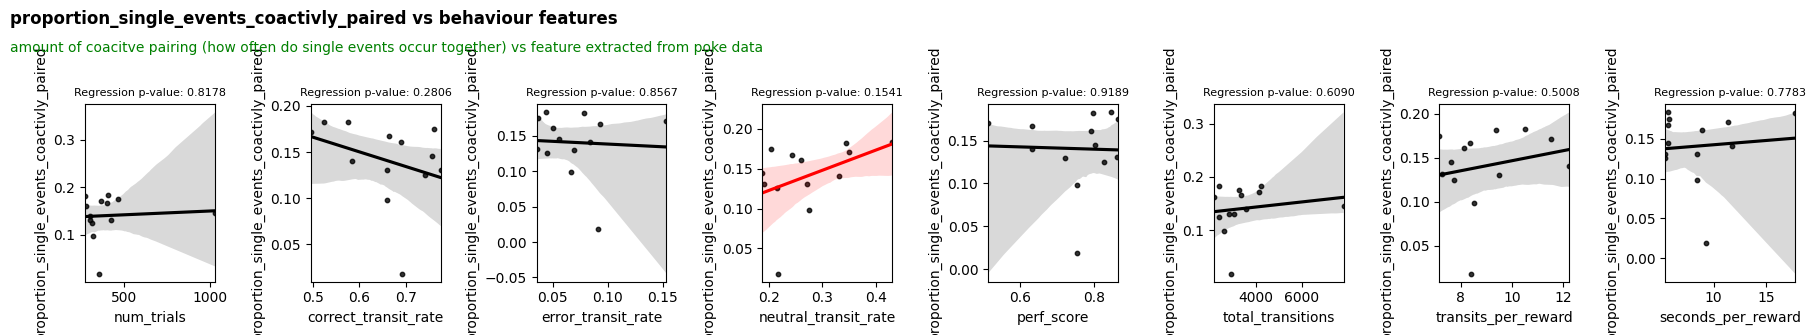

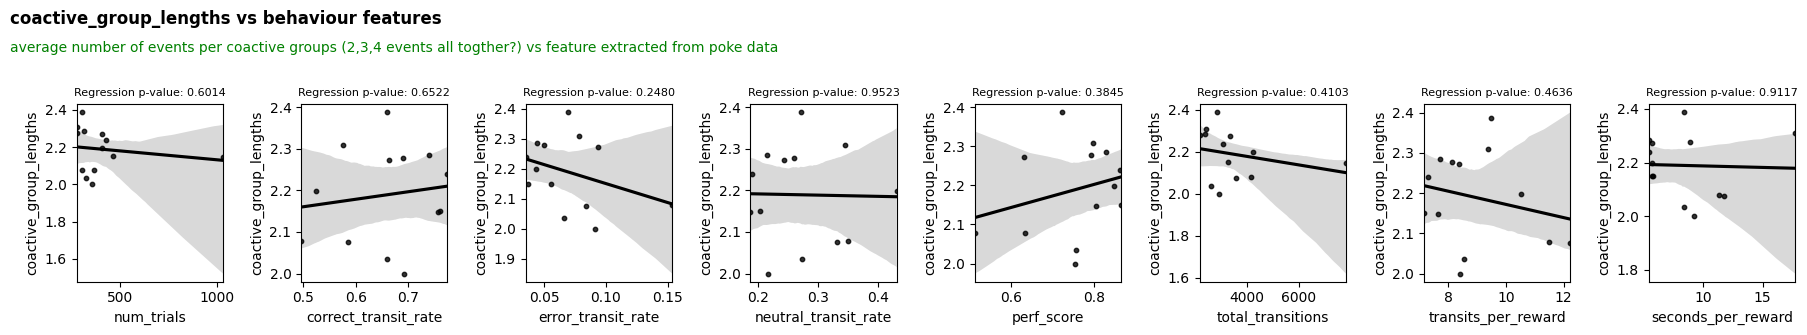

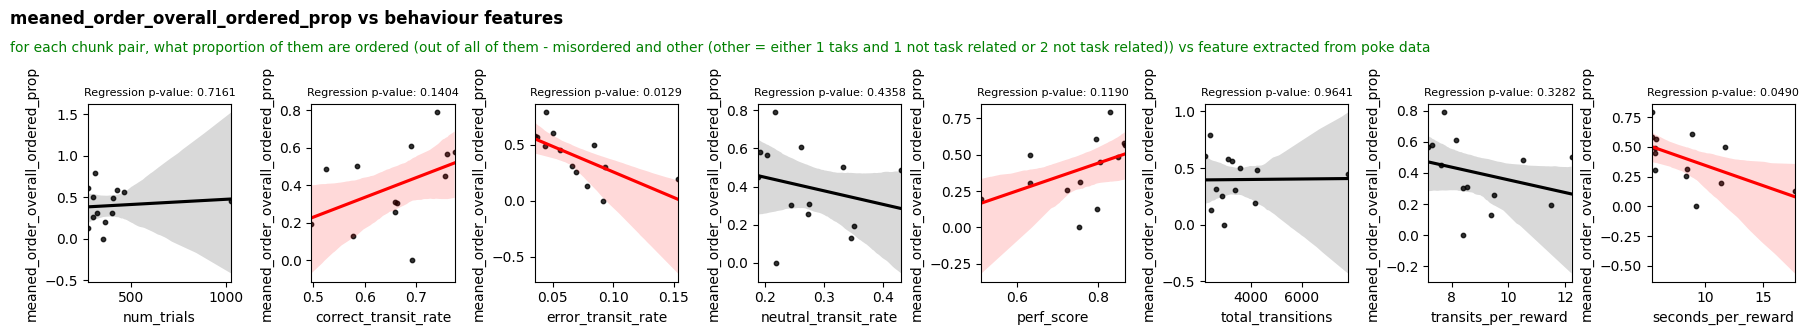

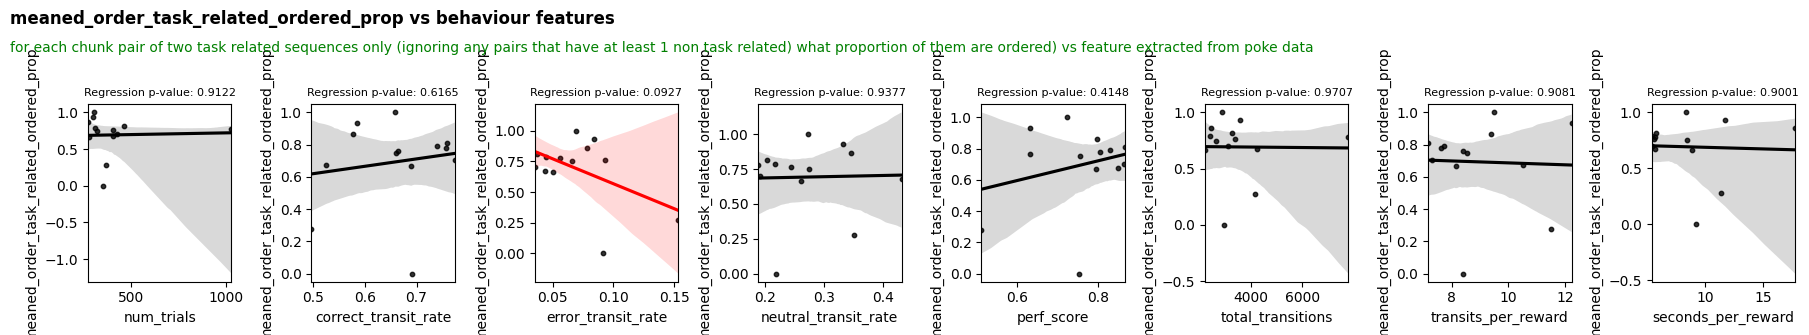

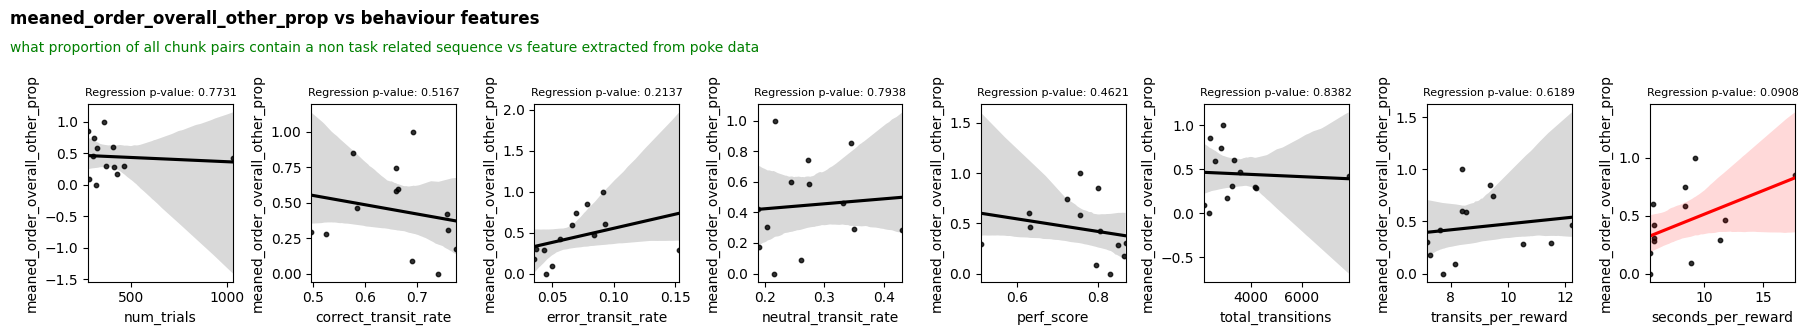

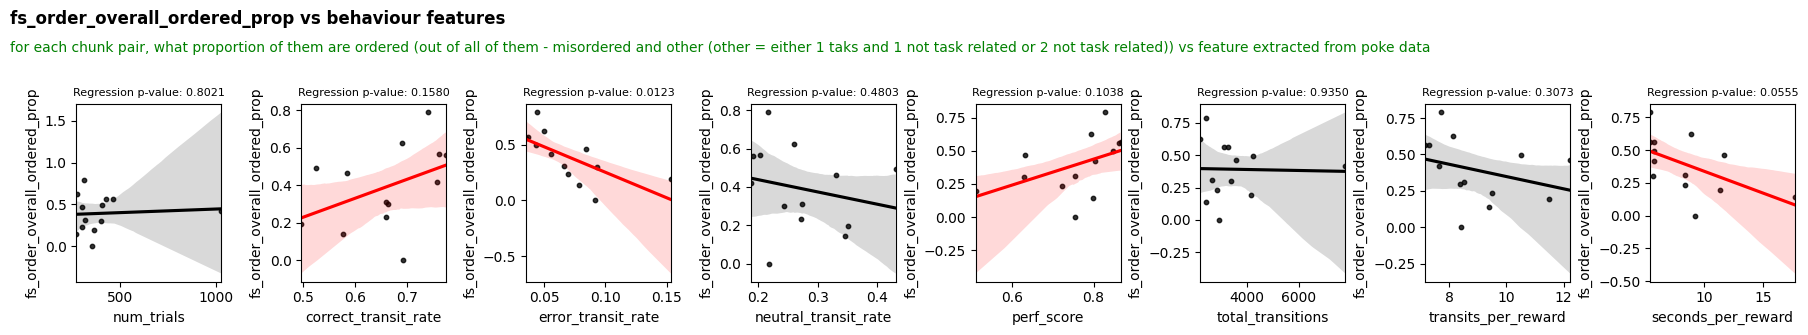

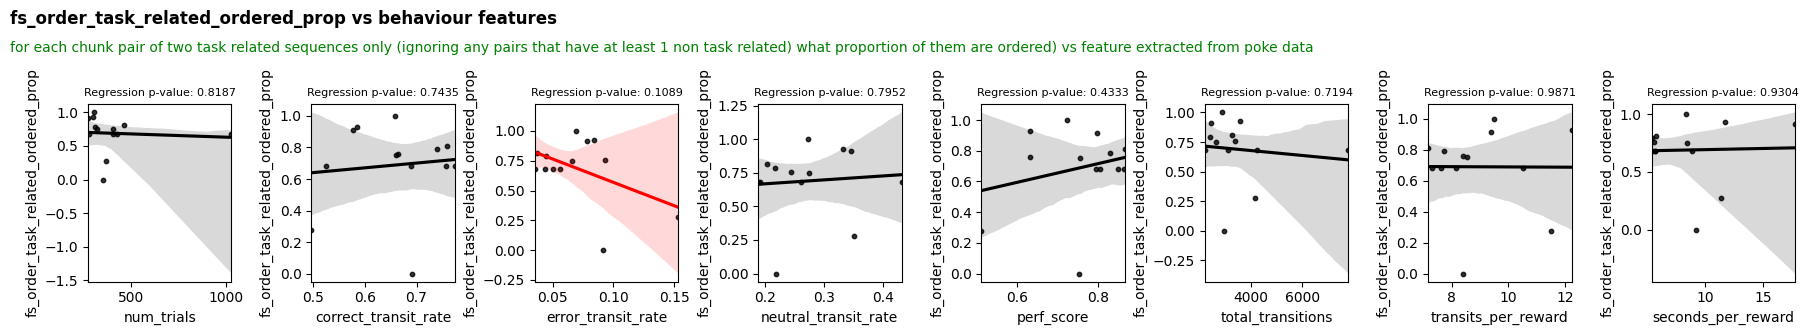

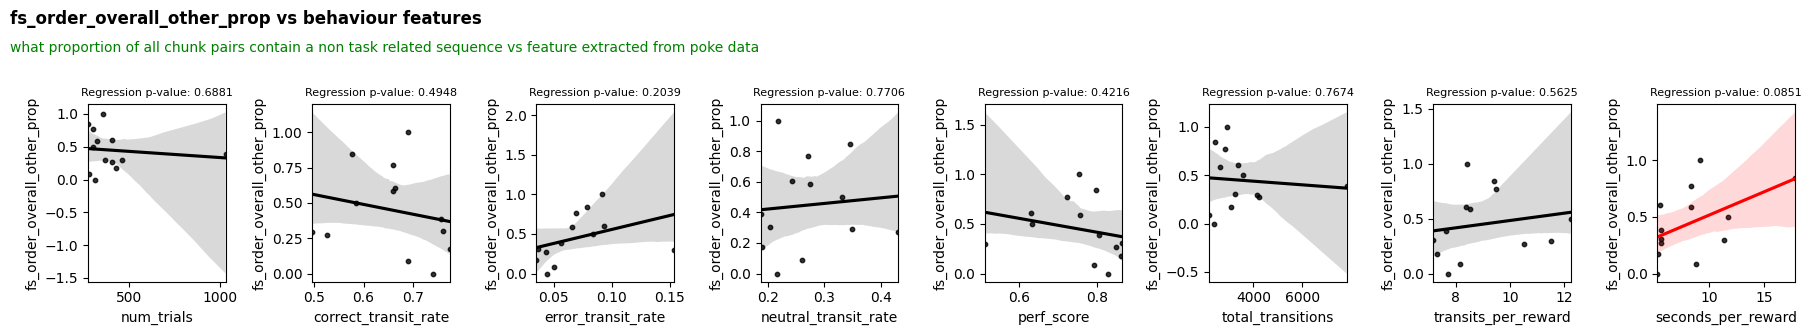

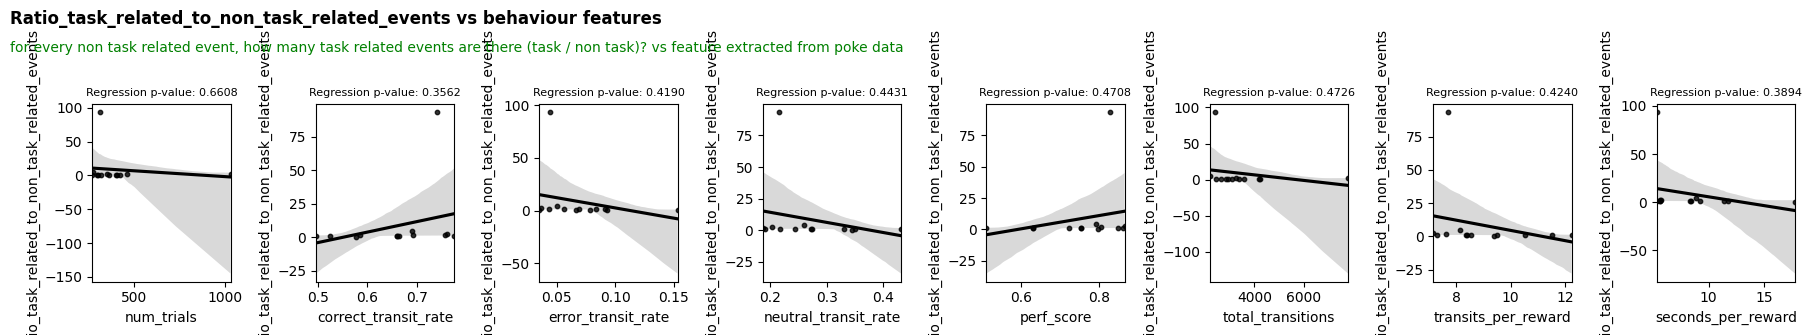

In [560]:

##1 
var1 = 'event_rpm'
details = 'replay events (all)  per minute'
y_axis_data = all_mice_replay_data_variables[var1]
plot_regressions_replay_vs_poke_data(var1,details,y_axis_data)

##2 
var1 = 'spikes_per_event'
details = 'mean spikes found in each replay event'
mean_ = []
for item in all_mice_replay_data_variables[var1]:
    mean_ += [np.mean(item)]
y_axis_data = mean_
plot_regressions_replay_vs_poke_data(var1,details,y_axis_data)

##3
var1 = 'units_per_event'
details = 'mean number of neurons found in each replay event'
mean_ = []
for item in all_mice_replay_data_variables[var1]:
    mean_ += [np.mean(item)]
y_axis_data = mean_
plot_regressions_replay_vs_poke_data(var1,details,y_axis_data)

##4
var1 = 'event_lengths'
details = 'average replay events length'
mean_ = []
for item in all_mice_replay_data_variables[var1]:
    mean_ += [np.mean(item)]
y_axis_data = mean_
plot_regressions_replay_vs_poke_data(var1,details,y_axis_data)


##5
var1 = 'proportion_single_events_coactivly_paired'
details = 'amount of coacitve pairing (how often do single events occur together)'
y_axis_data = all_mice_replay_data_variables[var1]
plot_regressions_replay_vs_poke_data(var1,details,y_axis_data)

##6
var1 = 'coactive_group_lengths'
details = 'average number of events per coactive groups (2,3,4 events all togther?)'
mean_ = []
for item in all_mice_replay_data_variables[var1]:
    mean_ += [np.mean(item)]
y_axis_data = mean_
plot_regressions_replay_vs_poke_data(var1,details,y_axis_data)

##7
var1 = 'meaned_order_overall_ordered_prop'
details = 'for each chunk pair, what proportion of them are ordered (out of all of them - misordered and other (other = either 1 taks and 1 not task related or 2 not task related))'
y_axis_data = all_mice_replay_data_variables[var1]
plot_regressions_replay_vs_poke_data(var1,details,y_axis_data)

##8
var1 = 'meaned_order_task_related_ordered_prop'
details = 'for each chunk pair of two task related sequences only (ignoring any pairs that have at least 1 non task related) what proportion of them are ordered)'
y_axis_data = all_mice_replay_data_variables[var1]
plot_regressions_replay_vs_poke_data(var1,details,y_axis_data)

##9
var1 = 'meaned_order_overall_other_prop'
details = 'what proportion of all chunk pairs contain a non task related sequence'
y_axis_data = all_mice_replay_data_variables[var1]
plot_regressions_replay_vs_poke_data(var1,details,y_axis_data)

##10
var1 = 'fs_order_overall_ordered_prop'
details = 'for each chunk pair, what proportion of them are ordered (out of all of them - misordered and other (other = either 1 taks and 1 not task related or 2 not task related))'
y_axis_data = all_mice_replay_data_variables[var1]
plot_regressions_replay_vs_poke_data(var1,details,y_axis_data)

##11
var1 = 'fs_order_task_related_ordered_prop'
details = 'for each chunk pair of two task related sequences only (ignoring any pairs that have at least 1 non task related) what proportion of them are ordered)'
y_axis_data = all_mice_replay_data_variables[var1]
plot_regressions_replay_vs_poke_data(var1,details,y_axis_data)

##12
var1 = 'fs_order_overall_other_prop'
details = 'what proportion of all chunk pairs contain a non task related sequence'
y_axis_data = all_mice_replay_data_variables[var1]
plot_regressions_replay_vs_poke_data(var1,details,y_axis_data)

# ##13
var1 = 'Ratio_task_related_to_non_task_related_events'
details = 'for every non task related event, how many task related events are there (task / non task)?'
mean_ = []
for item in all_mice_replay_data_variables[var1]:
    mean_ += [np.nanmean(item)]
y_axis_data = mean_
plot_regressions_replay_vs_poke_data(var1,details,y_axis_data)





,mouse_name,sequence_motif,mean_h_distance_from_av_mm,std_h_distance_from_av_mm,mean_dtw_distance_from_av_mm,std_dtw_distance_from_av_mm,mean_movement_speed_mm_s,std_movement_speed_mm_s
0,EJT178_2_4,6,2.366589,1.625644,2.506427,1.009707,67.519385,12.420947
1,EJT178_2_4,4,1.426859,1.069961,2.881692,1.527605,74.587808,10.430288
2,EJT178_2_4,5,2.047140,2.291968,2.679373,1.004726,78.721716,9.576173
3,EJT178_2_4,3,2.597502,2.781081,2.165425,0.988928,30.737954,15.880053


In [531]:
def create_df_current(input_var,input_var_str,mouse,current_mouse_data,motif_event_rpm,motif_relative_event_proportion,motif_by_motif_spikes_per_event,motif_by_motif_units_per_event,motif_by_motif_event_lengths,motif_proportion_coactive,motif_meaned_ordering_ordered_prop_out_of_all_task_related,motif_fs_ordering_ordered_prop_out_of_all_task_related):
    return pd.DataFrame({'mouse': len(current_mouse_data)*[mouse],
            input_var_str: input_var,
            'motif_event_rpm': motif_event_rpm,
                'motif_relative_event_proportion': motif_relative_event_proportion,
                    'motif_by_motif_spikes_per_event': motif_by_motif_spikes_per_event,
                    'motif_by_motif_units_per_event': motif_by_motif_units_per_event,
                    'motif_by_motif_event_lengths': motif_by_motif_event_lengths,
                    'motif_proportion_coactive': motif_proportion_coactive,
                    'motif_meaned_ordering_ordered_prop_out_of_all_task_related': motif_meaned_ordering_ordered_prop_out_of_all_task_related,
                    'motif_fs_ordering_ordered_prop_out_of_all_task_related': motif_fs_ordering_ordered_prop_out_of_all_task_related})


In [544]:
mean_h_distance_df = pd.DataFrame()
std_h_distance_df  = pd.DataFrame()
mean_dtw_distance_df  = pd.DataFrame()
std_dtw_distance_df  = pd.DataFrame()
mean_mov_speed_df  = pd.DataFrame() 
std_move_speed_df  = pd.DataFrame()

## loop across mouse for tracking data
for mouse in all_mice_processed_tracking_data.mouse_name.unique():
    print(mouse)
    current_mouse_data = all_mice_processed_tracking_data[all_mice_processed_tracking_data.mouse_name == mouse]

    # find the same mouse data for the replay data
    found = False
    for index, mouse_ in enumerate(all_mice_replay_data_variables['mouse']):
        if mouse_ == mouse:
            mouse_index = index
            print(index)
            found = True
    if found == True:
        # extract replay data for that mouse
        motif_event_rpm =all_mice_replay_data_variables['motif_event_rpm'][mouse_index]
        motif_event_rpm = list(np.array(motif_event_rpm)[current_mouse_data.sequence_motif.values-1])
        
        motif_relative_event_proportion =all_mice_replay_data_variables['motif_relative_event_proportion'][mouse_index]
        motif_relative_event_proportion = list(np.array(motif_relative_event_proportion)[current_mouse_data.sequence_motif.values-1])
        
        motif_by_motif_spikes_per_event = all_mice_replay_data_variables['motif_by_motif_spikes_per_event'][mouse_index]
        motif_by_motif_spikes_per_event = np.array([np.mean(item) for item in motif_by_motif_spikes_per_event])[current_mouse_data.sequence_motif.values-1]
        
        motif_by_motif_units_per_event = all_mice_replay_data_variables['motif_by_motif_units_per_event'][mouse_index]
        motif_by_motif_units_per_event = np.array([np.mean(item) for item in motif_by_motif_units_per_event])[current_mouse_data.sequence_motif.values-1]
        
        motif_by_motif_event_lengths = all_mice_replay_data_variables['motif_by_motif_event_lengths'][mouse_index]
        motif_by_motif_event_lengths = np.array([np.mean(item) for item in motif_by_motif_event_lengths])[current_mouse_data.sequence_motif.values-1]
        
        motif_proportion_coactive =all_mice_replay_data_variables['motif_proportion_coactive'][mouse_index]
        motif_proportion_coactive = list(np.array(motif_proportion_coactive)[current_mouse_data.sequence_motif.values-1])

        motif_meaned_ordering_ordered_prop_out_of_all_task_related =all_mice_replay_data_variables['motif_meaned_ordering_ordered_prop_out_of_all_task_related'][mouse_index]
        motif_meaned_ordering_ordered_prop_out_of_all_task_related = list(np.array(motif_meaned_ordering_ordered_prop_out_of_all_task_related)[current_mouse_data.sequence_motif.values-1])
        motif_meaned_ordering_ordered_prop_out_of_all_task_related = convert_string_list_to_list(motif_meaned_ordering_ordered_prop_out_of_all_task_related)
        
        motif_fs_ordering_ordered_prop_out_of_all_task_related =all_mice_replay_data_variables['motif_fs_ordering_ordered_prop_out_of_all_task_related'][mouse_index]
        motif_fs_ordering_ordered_prop_out_of_all_task_related = list(np.array(motif_fs_ordering_ordered_prop_out_of_all_task_related)[current_mouse_data.sequence_motif.values-1])
        motif_fs_ordering_ordered_prop_out_of_all_task_related = convert_string_list_to_list(motif_fs_ordering_ordered_prop_out_of_all_task_related)
        
        # extract tracking data for that mouse 
        # Hausdorff distance 
        mean_h_distance = current_mouse_data.mean_h_distance_from_av_mm.values
        std_h_distance = current_mouse_data.std_h_distance_from_av_mm.values

        # dwt distance 
        mean_dtw_distance = current_mouse_data.mean_dtw_distance_from_av_mm.values
        std_dtw_distance = current_mouse_data.std_dtw_distance_from_av_mm.values

        # movment speed
        mean_mov_speed = current_mouse_data.mean_movement_speed_mm_s.values
        std_move_speed = current_mouse_data.std_movement_speed_mm_s.values
        
        mean_h_distance_df_current = create_df_current(mean_h_distance,'mean_h_distance',mouse,current_mouse_data,motif_event_rpm,motif_relative_event_proportion,motif_by_motif_spikes_per_event,motif_by_motif_units_per_event,motif_by_motif_event_lengths,motif_proportion_coactive,motif_meaned_ordering_ordered_prop_out_of_all_task_related,motif_fs_ordering_ordered_prop_out_of_all_task_related)
        std_h_distance_df_current = create_df_current(std_h_distance,'std_h_distance',mouse,current_mouse_data,motif_event_rpm,motif_relative_event_proportion,motif_by_motif_spikes_per_event,motif_by_motif_units_per_event,motif_by_motif_event_lengths,motif_proportion_coactive,motif_meaned_ordering_ordered_prop_out_of_all_task_related,motif_fs_ordering_ordered_prop_out_of_all_task_related)
        mean_dtw_distance_df_current = create_df_current(mean_dtw_distance,'mean_dtw_distance',mouse,current_mouse_data,motif_event_rpm,motif_relative_event_proportion,motif_by_motif_spikes_per_event,motif_by_motif_units_per_event,motif_by_motif_event_lengths,motif_proportion_coactive,motif_meaned_ordering_ordered_prop_out_of_all_task_related,motif_fs_ordering_ordered_prop_out_of_all_task_related)
        std_dtw_distance_df_current = create_df_current(std_dtw_distance,'std_dtw_distance',mouse,current_mouse_data,motif_event_rpm,motif_relative_event_proportion,motif_by_motif_spikes_per_event,motif_by_motif_units_per_event,motif_by_motif_event_lengths,motif_proportion_coactive,motif_meaned_ordering_ordered_prop_out_of_all_task_related,motif_fs_ordering_ordered_prop_out_of_all_task_related)
        mean_mov_speed_df_current = create_df_current(mean_mov_speed,'mean_mov_speed',mouse,current_mouse_data,motif_event_rpm,motif_relative_event_proportion,motif_by_motif_spikes_per_event,motif_by_motif_units_per_event,motif_by_motif_event_lengths,motif_proportion_coactive,motif_meaned_ordering_ordered_prop_out_of_all_task_related,motif_fs_ordering_ordered_prop_out_of_all_task_related)
        std_move_speed_df_current = create_df_current(std_move_speed,'std_move_speed',mouse,current_mouse_data,motif_event_rpm,motif_relative_event_proportion,motif_by_motif_spikes_per_event,motif_by_motif_units_per_event,motif_by_motif_event_lengths,motif_proportion_coactive,motif_meaned_ordering_ordered_prop_out_of_all_task_related,motif_fs_ordering_ordered_prop_out_of_all_task_related)
   

    mean_h_distance_df = pd.concat([mean_h_distance_df,mean_h_distance_df_current])
    std_h_distance_df = pd.concat([std_h_distance_df,std_h_distance_df_current])
    mean_dtw_distance_df = pd.concat([mean_dtw_distance_df,mean_dtw_distance_df_current])
    std_dtw_distance_df = pd.concat([std_dtw_distance_df,std_dtw_distance_df_current])
    mean_mov_speed_df = pd.concat([mean_mov_speed_df,mean_mov_speed_df_current])
    std_move_speed_df = pd.concat([std_move_speed_df,std_move_speed_df_current])
    
    

EJT136_1_3
0
EJT136_1_4
1
EJT149_1_1
2
EJT178_1_4
3
EJT178_1_5
4
EJT178_1_6
5
EJT178_1_7
6
EJT178_1_8
7
EJT178_1_9
8
EJT178_2_1
9
EJT178_2_2
10
EJT178_2_4
11


c:\miniconda\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\miniconda\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_44612\1989916116.py:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_h_distance_df = pd.concat([mean_h_distance_df,mean_h_distance_df_current])
C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_44612\1989916116.py:70: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-N

Plots

In [551]:
def plot_regressions_replay_vs_tracking_data(var1,details,y_axis_data,mean_h_distance_df):
    fig, ax = plt.subplots(1,len(list(mean_h_distance_df)[2::]),figsize=(18, 3))
    plot_counter = 0
    for key in list(mean_h_distance_df)[2::]:
        regression_plot(y_axis_data,mean_h_distance_df[str(key)],var1,str(key),ax[plot_counter],plot_counter)
        plot_counter += 1
        
    # Add a title above all subplots
    fig.suptitle(f'{var1} vs behaviour features', fontsize=12, fontweight="bold", x = 0,y = 1.1, ha = 'left')
    # Add a subheading using fig.text()
    fig.text(0, 0.96, f"{details} vs feature extracted from poke data", ha='left', fontsize=10, color = 'green')
    # Adjust layout for better spacing
    plt.tight_layout()  # Adjust bottom spacing

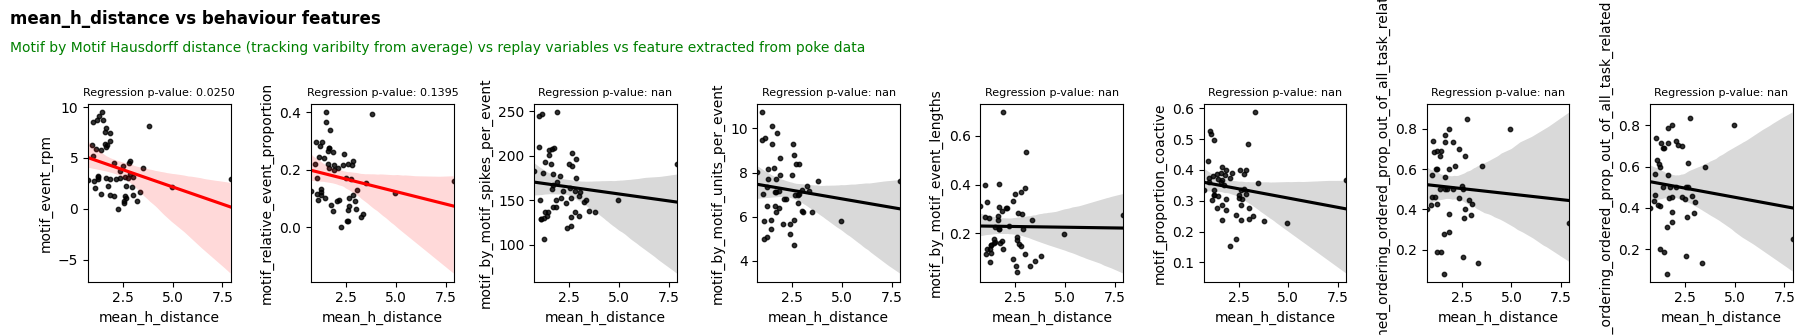

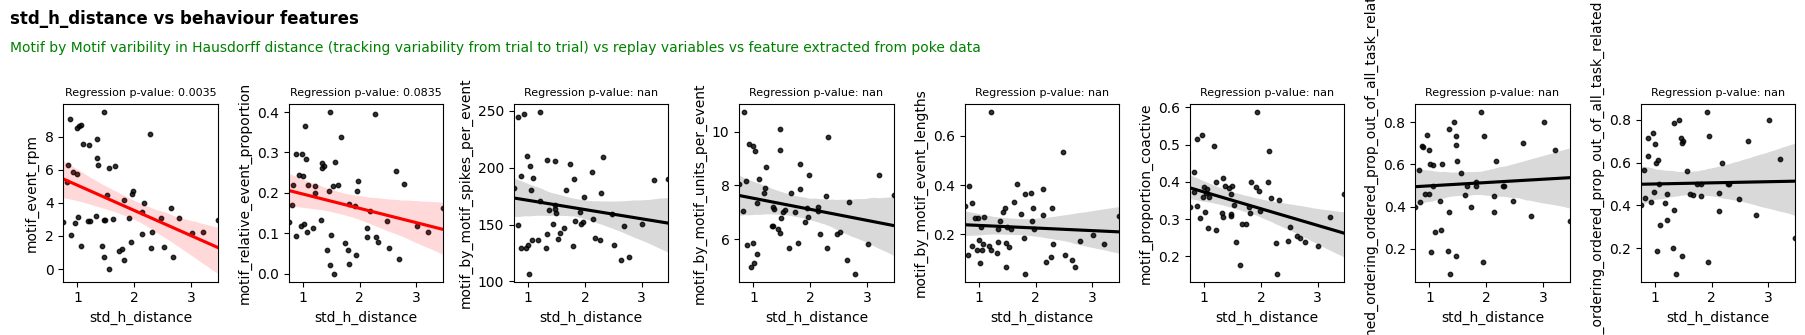

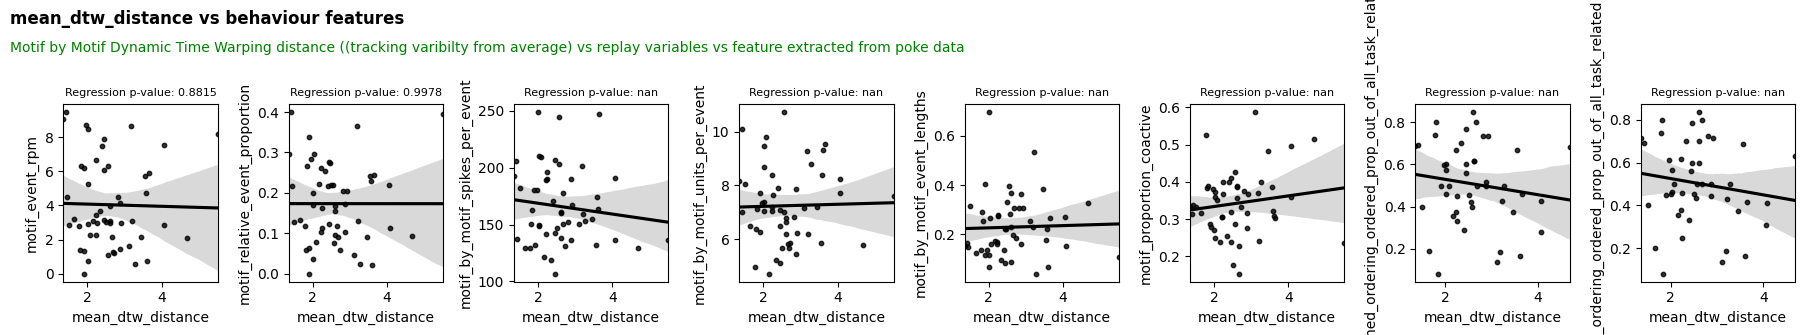

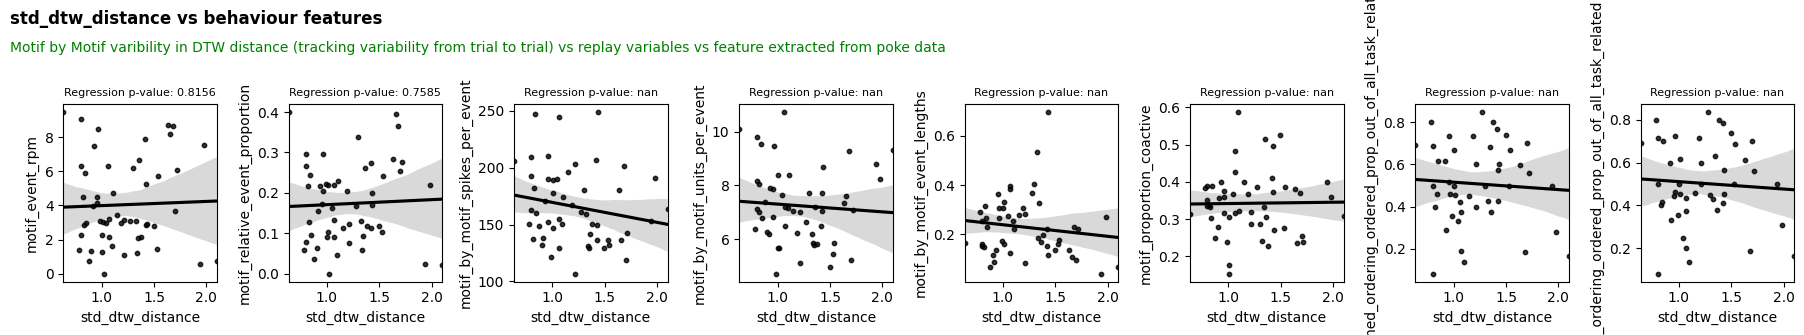

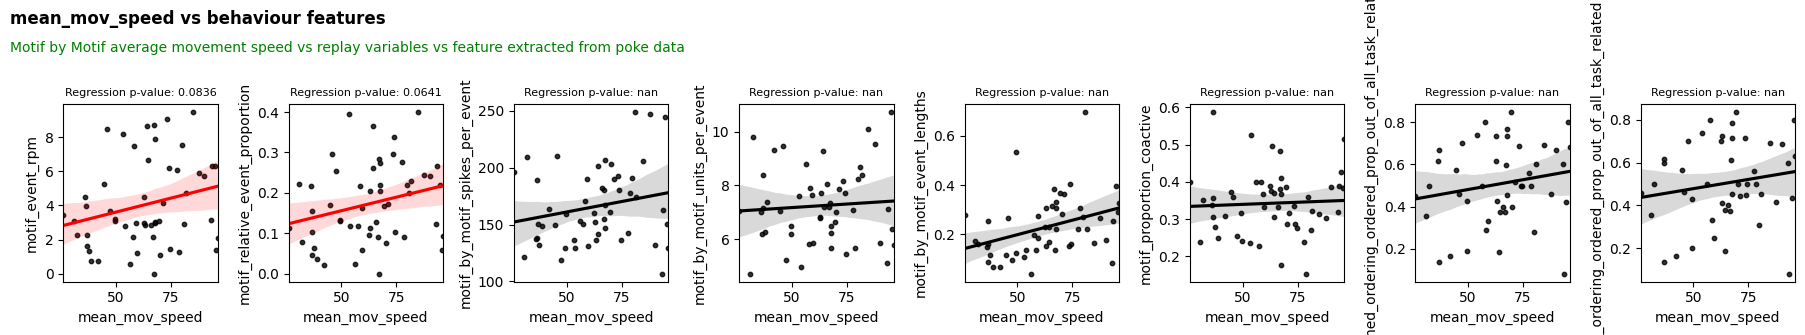

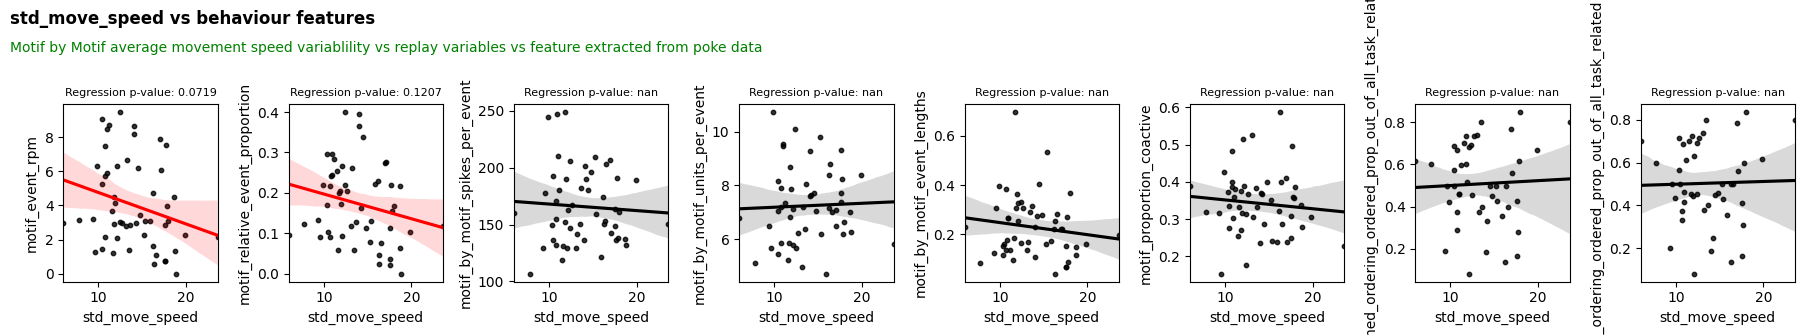

In [552]:
var1 = 'mean_h_distance'
details = 'Motif by Motif Hausdorff distance (tracking varibilty from average) vs replay variables'
y_axis_data = mean_h_distance_df.mean_h_distance
plot_regressions_replay_vs_tracking_data(var1,details,y_axis_data,mean_h_distance_df)

var1 = 'std_h_distance'
details = 'Motif by Motif varibility in Hausdorff distance (tracking variability from trial to trial) vs replay variables'
y_axis_data = std_h_distance_df.std_h_distance
plot_regressions_replay_vs_tracking_data(var1,details,y_axis_data,std_h_distance_df)

var1 = 'mean_dtw_distance'
details = 'Motif by Motif Dynamic Time Warping distance ((tracking varibilty from average) vs replay variables'
y_axis_data = mean_dtw_distance_df.mean_dtw_distance
plot_regressions_replay_vs_tracking_data(var1,details,y_axis_data,mean_dtw_distance_df)

var1 = 'std_dtw_distance'
details = 'Motif by Motif varibility in DTW distance (tracking variability from trial to trial) vs replay variables'
y_axis_data = std_dtw_distance_df.std_dtw_distance
plot_regressions_replay_vs_tracking_data(var1,details,y_axis_data,std_dtw_distance_df)

var1 = 'mean_mov_speed'
details = 'Motif by Motif average movement speed vs replay variables'
y_axis_data = mean_mov_speed_df.mean_mov_speed
plot_regressions_replay_vs_tracking_data(var1,details,y_axis_data,mean_mov_speed_df)

var1 = 'std_move_speed'
details = 'Motif by Motif average movement speed variablility vs replay variables'
y_axis_data = std_move_speed_df.std_move_speed
plot_regressions_replay_vs_tracking_data(var1,details,y_axis_data,std_move_speed_df)


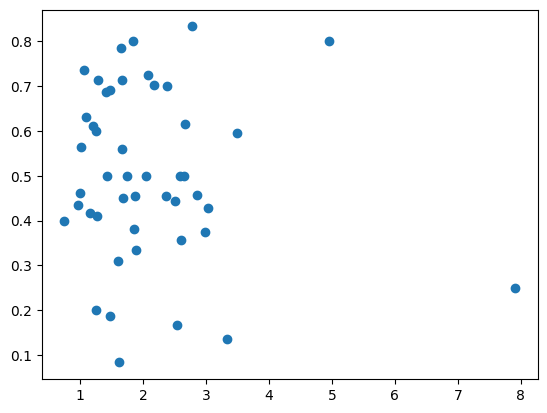

In [469]:
plt.plot(mean_h_distance_df.mean_h_distance,mean_h_distance_df.motif_fs_ordering_ordered_prop_out_of_all_task_related,'o')

In [462]:
mean_h_distance_df

,mouse,mean_h_distance,motif_event_rpm,motif_relative_event_proportion,motif_by_motif_spikes_per_event,motif_by_motif_units_per_event,motif_by_motif_event_lengths,motif_proportion_coactive,motif_meaned_ordering_ordered_prop_out_of_all_task_related,motif_fs_ordering_ordered_prop_out_of_all_task_related
0,EJT136_1_3,3.337952,1.609905,0.046699,150.793103,7.172414,0.254845,0.586207,0.136364,0.136364
1,EJT136_1_3,1.878328,7.494384,0.217391,170.296296,7.911111,0.134522,0.400000,0.290323,0.333333
2,EJT136_1_3,1.601577,7.549898,0.219002,191.183824,8.227941,0.270350,0.360294,0.277778,0.309091
3,EJT136_1_3,2.543798,0.721681,0.020934,163.692308,9.307692,0.065538,0.307692,0.166667,0.166667
0,EJT136_1_4,3.031714,3.107143,0.130631,159.620690,6.206897,0.533869,0.241379,0.428571,0.428571
1,EJT136_1_4,1.478046,8.678571,0.364865,201.345679,9.296296,0.227568,0.370370,0.187500,0.187500
2,EJT136_1_4,1.843062,1.392857,0.058559,150.153846,6.384615,0.290400,0.384615,0.800000,0.800000
3,EJT136_1_4,1.620189,6.321429,0.265766,162.372881,7.135593,0.254227,0.389831,0.083333,0.083333
4,EJT136_1_4,2.577488,0.535714,0.022523,153.000000,8.800000,0.040420,0.400000,0.500000,0.500000
0,EJT149_1_1,1.846244,6.693936,0.260870,142.073643,7.182171,0.168826,0.306202,0.376471,0.380952


In [460]:
mean_h_distance_df.mean_h_distance

0    3.337952
1    1.878328
2    1.601577
3    2.543798
0    3.031714
1    1.478046
2    1.843062
3    1.620189
4    2.577488
0    1.846244
1    1.243481
2    1.262402
3    3.494431
0    0.992544
1    1.650855
2    0.963186
3    1.744426
4    2.237220
0    2.769870
1    1.682598
2    4.948569
3    7.912577
0    2.079626
1    1.096348
2    0.744858
3    2.665737
4    1.667985
0    2.166821
1    1.205487
2    1.283926
3    1.018459
4    2.853076
0    2.976904
1    1.408604
2    1.472383
3    1.065973
0    2.598673
1    3.797763
2    2.861448
3    3.004220
4    3.229897
5    2.795611
0    2.498009
1    1.151572
2    1.254229
0    1.669042
1    2.642988
2    1.872254
3    2.378763
0    2.366589
1    1.426859
2    2.047140
3    2.597502
Name: mean_h_distance, dtype: float64

In [457]:
mean_h_distance_df

,mouse,mean_h_distance,motif_event_rpm,motif_relative_event_proportion,motif_by_motif_spikes_per_event,motif_by_motif_units_per_event,motif_by_motif_event_lengths,motif_proportion_coactive,motif_meaned_ordering_ordered_prop_out_of_all_task_related,motif_fs_ordering_ordered_prop_out_of_all_task_related
0,EJT136_1_3,3.337952,1.609905,0.046699,150.793103,7.172414,0.254845,0.586207,0.136364,0.136364
1,EJT136_1_3,1.878328,7.494384,0.217391,170.296296,7.911111,0.134522,0.400000,0.290323,0.333333
2,EJT136_1_3,1.601577,7.549898,0.219002,191.183824,8.227941,0.270350,0.360294,0.277778,0.309091
3,EJT136_1_3,2.543798,0.721681,0.020934,163.692308,9.307692,0.065538,0.307692,0.166667,0.166667
0,EJT136_1_4,3.031714,3.107143,0.130631,159.620690,6.206897,0.533869,0.241379,0.428571,0.428571
1,EJT136_1_4,1.478046,8.678571,0.364865,201.345679,9.296296,0.227568,0.370370,0.187500,0.187500
2,EJT136_1_4,1.843062,1.392857,0.058559,150.153846,6.384615,0.290400,0.384615,0.800000,0.800000
3,EJT136_1_4,1.620189,6.321429,0.265766,162.372881,7.135593,0.254227,0.389831,0.083333,0.083333
4,EJT136_1_4,2.577488,0.535714,0.022523,153.000000,8.800000,0.040420,0.400000,0.500000,0.500000
0,EJT149_1_1,1.846244,6.693936,0.260870,142.073643,7.182171,0.168826,0.306202,0.376471,0.380952


In [448]:
mean_h_distance_df_current

,mouse,mean_h_distance,motif_event_rpm,motif_relative_event_proportion,motif_by_motif_spikes_per_event,motif_by_motif_units_per_event,motif_by_motif_event_lengths,motif_proportion_coactive,motif_meaned_ordering_ordered_prop_out_of_all_task_related,motif_fs_ordering_ordered_prop_out_of_all_task_related
0,EJT178_2_4,2.366589,3.023188,0.218310,146.806452,5.677419,0.331039,0.177419,0.454545,0.454545
1,EJT178_2_4,1.426859,1.414072,0.102113,136.310345,5.448276,0.160000,0.275862,0.500000,0.500000
2,EJT178_2_4,2.047140,1.267789,0.091549,177.307692,5.653846,0.305665,0.153846,0.500000,0.500000
3,EJT178_2_4,2.597502,3.071949,0.221831,121.253968,4.714286,0.174452,0.238095,0.357143,0.357143


In [446]:
df

,mouse,mean_h_distance,motif_event_rpm,motif_relative_event_proportion,motif_by_motif_spikes_per_event,motif_by_motif_units_per_event,motif_by_motif_event_lengths,motif_proportion_coactive,motif_meaned_ordering_ordered_prop_out_of_all_task_related,motif_fs_ordering_ordered_prop_out_of_all_task_related
0,EJT178_2_4,2.366589,3.023188,0.218310,146.806452,5.677419,0.331039,0.177419,0.454545,0.454545
1,EJT178_2_4,1.426859,1.414072,0.102113,136.310345,5.448276,0.160000,0.275862,0.500000,0.500000
2,EJT178_2_4,2.047140,1.267789,0.091549,177.307692,5.653846,0.305665,0.153846,0.500000,0.500000
3,EJT178_2_4,2.597502,3.071949,0.221831,121.253968,4.714286,0.174452,0.238095,0.357143,0.357143


In [440]:
mouse

'EJT178_2_4'

In [438]:
motif_event_rpm

[3.0231883189291917, 1.4140719556281702, 1.267788649873532, 3.0719494208474045]

In [437]:
mean_h_distance

array([2.36658883, 1.42685915, 2.04713979, 2.59750206])

In [436]:
motif_event_rpm

[3.0231883189291917, 1.4140719556281702, 1.267788649873532, 3.0719494208474045]

In [ ]:
current_mouse_data


In [444]:
df

,mouse
0,EJT178_2_4
1,EJT178_2_4
2,EJT178_2_4
3,EJT178_2_4


In [435]:
motif_event_rpm
motif_relative_event_proportion
motif_by_motif_spikes_per_event
motif_by_motif_units_per_event
motif_by_motif_event_lengths
motif_proportion_coactive
motif_meaned_ordering_ordered_prop_out_of_all_task_related
motif_fs_ordering_ordered_prop_out_of_all_task_related

[0.45454545454545453, 0.5, 0.5, 0.35714285714285715]

In [432]:
ast.literal_eval(motif_meaned_ordering_ordered_prop_out_of_all_task_related[-1])

ValueError: malformed node or string on line 1: <ast.Name object at 0x0000018DA1739710>

[0.45454545454545453, 0.5, 0.5, 0.35714285714285715]

In [425]:
motif_fs_ordering_ordered_prop_out_of_all_task_related

['0.45454545454545453', '0.5', '0.5', '0.35714285714285715']

In [420]:
motif_event_rpm

[3.0231883189291917, 1.4140719556281702, 1.267788649873532, 3.0719494208474045]

In [418]:
all_mice_replay_data_variables['motif_fs_ordering_ordered_prop_out_of_all_task_related'][0]

[0.3333333333333333,
 0.16666666666666666,
 0.13636363636363635,
 0.3090909090909091,
 'nan',
 'nan']

In [406]:
list(all_mice_replay_data_variables)

['mouse',
 'event_rpm',
 'motif_event_rpm',
 'motif_relative_event_proportion',
 'spikes_per_event',
 'motif_by_motif_spikes_per_event',
 'units_per_event',
 'motif_by_motif_units_per_event',
 'event_lengths',
 'motif_by_motif_event_lengths',
 'proportion_single_events_coactivly_paired',
 'coactive_group_lengths',
 'meaned_order_overall_ordered_prop',
 'meaned_order_task_related_ordered_prop',
 'meaned_order_overall_other_prop',
 'fs_order_overall_ordered_prop',
 'fs_order_task_related_ordered_prop',
 'fs_order_overall_other_prop',
 'motif_proportion_coactive',
 'motif_meaned_ordering_ordered_prop_out_of_all_task_related',
 'motif_fs_ordering_ordered_prop_out_of_all_task_related',
 'Ratio_task_related_to_non_task_related_events']

array([3.02318832, 1.41407196, 1.26778865, 3.07194942])

array([6, 4, 5, 3], dtype=int64)

In [387]:
motif_event_rpm

[1.9992051786467235,
 3.0719494208474045,
 3.0719494208474045,
 1.4140719556281702,
 1.267788649873532,
 3.0231883189291917]

In [393]:
all_mice_replay_data_variables['motif_event_rpm'][mouse_index]

[1.9992051786467235,
 3.0719494208474045,
 3.0719494208474045,
 1.4140719556281702,
 1.267788649873532,
 3.0231883189291917]

array([ 98.02439024, 125.52380952, 121.25396825, 136.31034483,
       177.30769231, 146.80645161])

In [385]:
mouse_index

11

In [377]:
list(all_mice_replay_data_variables)

['mouse',
 'event_rpm',
 'motif_event_rpm',
 'motif_relative_event_proportion',
 'spikes_per_event',
 'motif_by_motif_spikes_per_event',
 'units_per_event',
 'motif_by_motif_units_per_event',
 'event_lengths',
 'motif_by_motif_event_lengths',
 'proportion_single_events_coactivly_paired',
 'coactive_group_lengths',
 'meaned_order_overall_ordered_prop',
 'meaned_order_task_related_ordered_prop',
 'meaned_order_overall_other_prop',
 'fs_order_overall_ordered_prop',
 'fs_order_task_related_ordered_prop',
 'fs_order_overall_other_prop',
 'motif_proportion_coactive',
 'motif_meaned_ordering_ordered_prop_out_of_all_task_related',
 'motif_fs_ordering_ordered_prop_out_of_all_task_related',
 'Ratio_task_related_to_non_task_related_events']

In [368]:
np.array(motif_event_rpm)[current_mouse_data['sequence_motif'].values -1 ]

array([3.02318832, 1.41407196, 1.26778865, 3.07194942])

array([2.36658883, 1.42685915, 2.04713979, 2.59750206])

In [367]:
current_mouse_data['sequence_motif'].values -1 

array([5, 3, 4, 2], dtype=int64)

In [369]:
motif_event_rpm

[1.9992051786467235,
 3.0719494208474045,
 3.0719494208474045,
 1.4140719556281702,
 1.267788649873532,
 3.0231883189291917]

In [348]:
current_mouse_data

,mouse_name,sequence_motif,mean_h_distance_from_av_mm,std_h_distance_from_av_mm,mean_dtw_distance_from_av_mm,std_dtw_distance_from_av_mm,mean_movement_speed_mm_s,std_movement_speed_mm_s
0,EJT178_2_4,6,2.366589,1.625644,2.506427,1.009707,67.519385,12.420947
1,EJT178_2_4,4,1.426859,1.069961,2.881692,1.527605,74.587808,10.430288
2,EJT178_2_4,5,2.047140,2.291968,2.679373,1.004726,78.721716,9.576173
3,EJT178_2_4,3,2.597502,2.781081,2.165425,0.988928,30.737954,15.880053


In [329]:
current_mouse_data

,mouse_name,sequence_motif,mean_h_distance_from_av_mm,std_h_distance_from_av_mm,mean_dtw_distance_from_av_mm,std_dtw_distance_from_av_mm,mean_movement_speed_mm_s,std_movement_speed_mm_s
0,EJT178_2_4,6,2.366589,1.625644,2.506427,1.009707,67.519385,12.420947
1,EJT178_2_4,4,1.426859,1.069961,2.881692,1.527605,74.587808,10.430288
2,EJT178_2_4,5,2.047140,2.291968,2.679373,1.004726,78.721716,9.576173
3,EJT178_2_4,3,2.597502,2.781081,2.165425,0.988928,30.737954,15.880053


11


In [350]:
list(all_mice_replay_data_variables)

['mouse',
 'event_rpm',
 'motif_event_rpm',
 'motif_relative_event_proportion',
 'spikes_per_event',
 'motif_by_motif_spikes_per_event',
 'units_per_event',
 'motif_by_motif_units_per_event',
 'event_lengths',
 'motif_by_motif_event_lengths',
 'proportion_single_events_coactivly_paired',
 'coactive_group_lengths',
 'meaned_order_overall_ordered_prop',
 'meaned_order_task_related_ordered_prop',
 'meaned_order_overall_other_prop',
 'fs_order_overall_ordered_prop',
 'fs_order_task_related_ordered_prop',
 'fs_order_overall_other_prop',
 'motif_proportion_coactive',
 'motif_meaned_ordering_ordered_prop_out_of_all_task_related',
 'motif_fs_ordering_ordered_prop_out_of_all_task_related',
 'Ratio_task_related_to_non_task_related_events']

In [339]:
np.where(all_mice_replay_data_variables['mouse'] == mouse)

C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_44612\3897395662.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  np.where(all_mice_replay_data_variables['mouse'] == mouse)


(array([], dtype=int64),)

In [342]:
all_mice_replay_data_variables['mouse'][-1] == mouse

True

In [337]:
mouse

'EJT178_2_4'

In [336]:
all_mice_replay_data_variables['mouse']

['EJT136_1_3',
 'EJT136_1_4',
 'EJT149_1_1',
 'EJT178_1_4',
 'EJT178_1_5',
 'EJT178_1_6',
 'EJT178_1_7',
 'EJT178_1_8',
 'EJT178_1_9',
 'EJT178_2_1',
 'EJT178_2_2',
 'EJT178_2_4']

In [315]:
list(all_mice_replay_data_variables)

['mouse',
 'event_rpm',
 'motif_event_rpm',
 'motif_relative_event_proportion',
 'spikes_per_event',
 'motif_by_motif_spikes_per_event',
 'units_per_event',
 'motif_by_motif_units_per_event',
 'event_lengths',
 'motif_by_motif_event_lengths',
 'proportion_single_events_coactivly_paired',
 'coactive_group_lengths',
 'meaned_order_overall_ordered_prop',
 'meaned_order_task_related_ordered_prop',
 'meaned_order_overall_other_prop',
 'fs_order_overall_ordered_prop',
 'fs_order_task_related_ordered_prop',
 'fs_order_overall_other_prop',
 'motif_proportion_coactive',
 'motif_meaned_ordering_ordered_prop_out_of_all_task_related',
 'motif_fs_ordering_ordered_prop_out_of_all_task_related',
 'Ratio_task_related_to_non_task_related_events']

In [333]:
mouse

'EJT178_2_4'

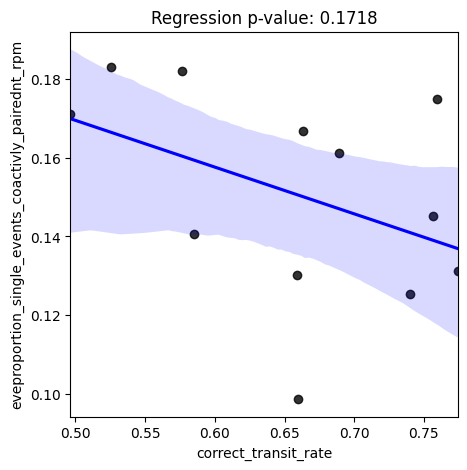

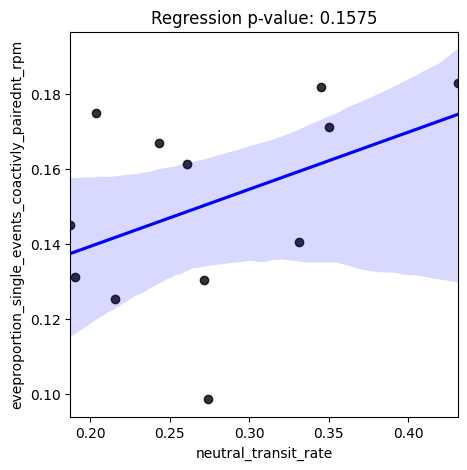

In [201]:
for key in list(all_mice_behav_vars_dict):
    if not key == 'mouse':
        regression_plot(all_mice_behav_vars_dict[key],all_mice_replay_data_variables['proportion_single_events_coactivly_paired'],key,'proportion_single_events_coactivly_pairednt_rpm')

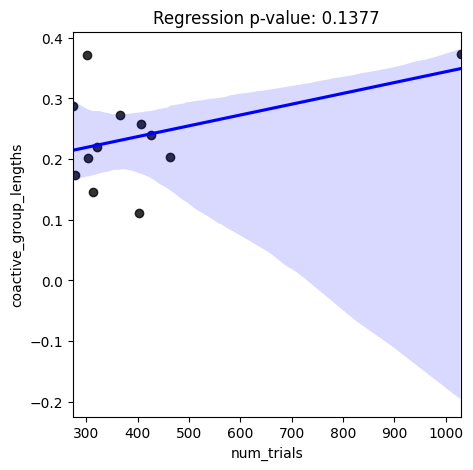

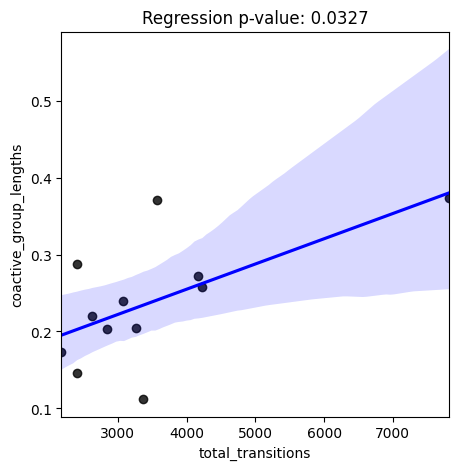

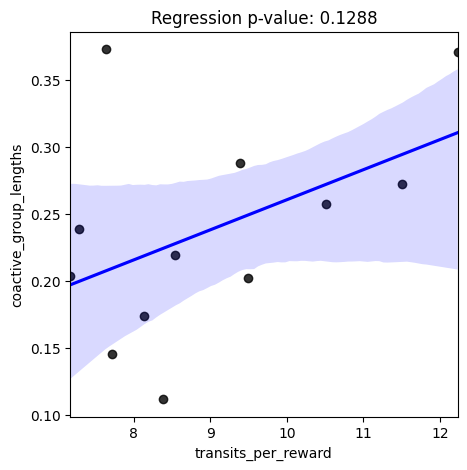

In [203]:
coactive_group_lengths = []
for item in all_mice_replay_data_variables['coactive_group_lengths']:
    coactive_group_lengths += [np.mean(item)]
for key in list(all_mice_behav_vars_dict):
    if not key == 'mouse':
        regression_plot(all_mice_behav_vars_dict[key],event_lengths,key,'coactive_group_lengths')

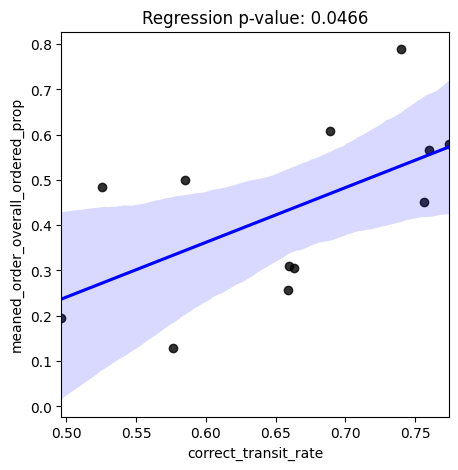

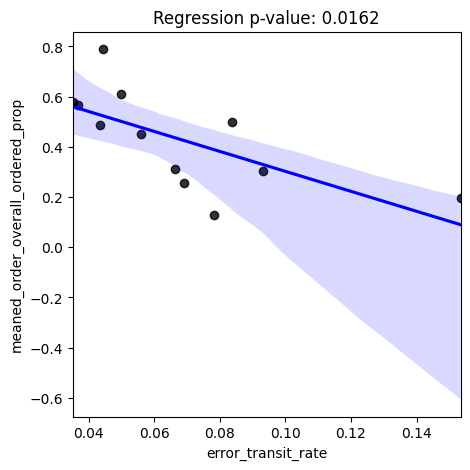

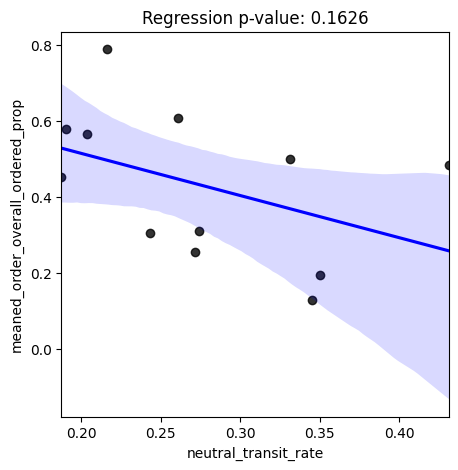

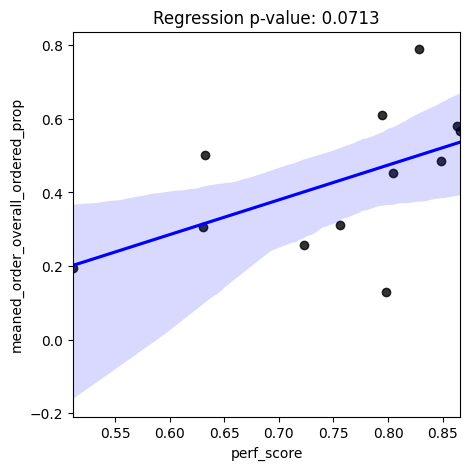

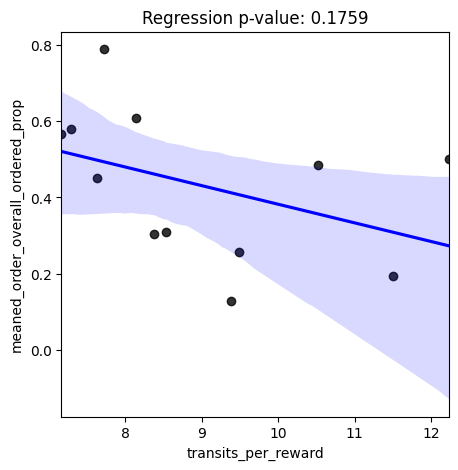

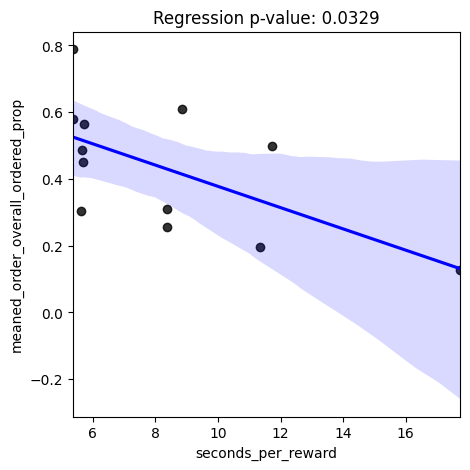

In [208]:

for key in list(all_mice_behav_vars_dict):
    if not key == 'mouse':
        regression_plot(all_mice_behav_vars_dict[key],all_mice_replay_data_variables['meaned_order_overall_ordered_prop'],key,'meaned_order_overall_ordered_prop')

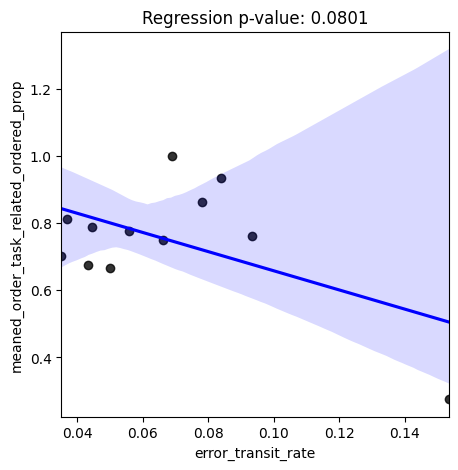

In [212]:
#### of all the 


for key in list(all_mice_behav_vars_dict):
    if not key == 'mouse':
        regression_plot(all_mice_behav_vars_dict[key],all_mice_replay_data_variables['meaned_order_task_related_ordered_prop'],key,'meaned_order_task_related_ordered_prop')



In [206]:
list(all_mice_replay_data_variables)


['mouse',
 'event_rpm',
 'motif_event_rpm',
 'motif_relative_event_proportion',
 'spikes_per_event',
 'motif_by_motif_spikes_per_event',
 'units_per_event',
 'motif_by_motif_units_per_event',
 'event_lengths',
 'motif_by_motif_event_lengths',
 'proportion_single_events_coactivly_paired',
 'coactive_group_lengths',
 'meaned_order_overall_ordered_prop',
 'meaned_order_task_related_ordered_prop',
 'meaned_order_overall_other_prop',
 'fs_order_overall_ordered_prop',
 'fs_order_task_related_ordered_prop',
 'fs_order_overall_other_prop',
 'motif_proportion_coactive',
 'motif_meaned_ordering_ordered_prop_out_of_all_task_related',
 'motif_fs_ordering_ordered_prop_out_of_all_task_related',
 'Ratio_task_related_to_non_task_related_events']

In [202]:
all_mice_replay_data_variables['coactive_group_lengths']

[[2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  6,
  4,
  4,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  2,
  2,
  2,
  2],
 [2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3],
 [3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2

In [192]:
list(all_mice_replay_data_variables)

['mouse',
 'event_rpm',
 'motif_event_rpm',
 'motif_relative_event_proportion',
 'spikes_per_event',
 'motif_by_motif_spikes_per_event',
 'units_per_event',
 'motif_by_motif_units_per_event',
 'event_lengths',
 'motif_by_motif_event_lengths',
 'proportion_single_events_coactivly_paired',
 'coactive_group_lengths',
 'meaned_order_overall_ordered_prop',
 'meaned_order_task_related_ordered_prop',
 'meaned_order_overall_other_prop',
 'fs_order_overall_ordered_prop',
 'fs_order_task_related_ordered_prop',
 'fs_order_overall_other_prop',
 'motif_proportion_coactive',
 'motif_meaned_ordering_ordered_prop_out_of_all_task_related',
 'motif_fs_ordering_ordered_prop_out_of_all_task_related',
 'Ratio_task_related_to_non_task_related_events']

In [187]:
spikes_per_event

[192.19323671497585,
 176.1216216216216,
 138.92416582406472,
 211.86382978723404,
 174.79569892473117,
 154.45299145299145,
 177.41775244299674,
 169.16326530612244,
 145.1717352415027,
 185.1113445378151,
 182.97297297297297,
 131.0950704225352]

In [185]:
len(all_mice_replay_data_variables['spikes_per_event'])

12

In [151]:
list(all_mice_replay_data_variables)

['event_rpm',
 'motif_event_rpm',
 'motif_relative_event_proportion',
 'spikes_per_event',
 'motif_by_motif_spikes_per_event',
 'units_per_event',
 'motif_by_motif_units_per_event',
 'event_lengths',
 'motif_by_motif_event_lengths',
 'proportion_single_events_coactivly_paired',
 'coactive_group_lengths',
 'meaned_order_overall_ordered_prop',
 'meaned_order_task_related_ordered_prop',
 'meaned_order_overall_other_prop',
 'fs_order_overall_ordered_prop',
 'fs_order_task_related_ordered_prop',
 'fs_order_overall_other_prop',
 'motif_proportion_coactive',
 'motif_meaned_ordering_ordered_prop_out_of_all_task_related',
 'motif_fs_ordering_ordered_prop_out_of_all_task_related',
 'Ratio_task_related_to_non_task_related_events',
 'mouse']

In [ ]:
for key in list(all_mice_behav_vars_dict):
    if not key == 'mouse':
        regression_plot(all_mice_behav_vars_dict[key],all_mice_replay_data_variables['event_rpm'],key,'event_rpm')